In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
from numpy import genfromtxt
from scipy import signal
from diff_tvr import *
from scipy import linalg as la
from scipy.optimize import minimize, fmin

In [2]:
force_actual = genfromtxt('./data/student_1_force_1.csv', delimiter=',')
strain_actual = genfromtxt('./data/student_1_strain_1.csv', delimiter=',')

In [176]:
def knife(x,u,dt,d,disturb=False):
    a = 1
    b = 1
    if disturb:
        return x + a*x*dt + b*(u+d)*dt
    return x + a*x*dt + b*u*dt

def ref_dynamics(dt):
    A = np.array([[1,dt],[0,1]])
    B = np.array([0,dt])
    return A, B

def get_closest_point(traj,x):
    dists = np.sqrt(np.sum((traj - x)**2,axis=1))
    idx = np.argmin(dists)
    return idx

def v2f(state,u,dt):
    new_state = state -4*state*dt + u*dt
    return new_state

In [118]:
strain_ref = np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.11130732,  0.22324677,
        0.33518623,  0.44712568,  0.55906513,  0.67100459,  0.78294404,
        0.8948835 ,  1.00682295,  1.11876241,  1.23070186,  1.34264132,
        1.45458077,  1.56652023,  1.67845968,  1.79039914,  1.90233859,
        2.01427805,  2.1262175 ,  2.23815696,  2.35009641,  2.46203587,
        2.57397532,  2.68591478,  2.79785423,  2.90979368,  3.02173314,
        3.13367259,  3.24561205,  3.3575515 ,  3.46949096,  3.58143041,
        3.69336987,  3.80530932,  3.91724878,  4.02918823,  4.14112769,
        4.25306714,  4.3650066 ,  4.47694605,  4.58888551,  4.70082496,
        4.81276442,  4.92470387,  5.03664333,  5.14858278,  5.26052223,
        5.37246169,  5.48440114,  5.5963406 ,  5.70828005,  5.82021951,
        5.93215896,  6.04409842,  6.15603787,  6.26797733,  6.37991678,
        6.49185624,  6.60379569,  6.71573515,  6.8276746 ,  6.93961406,
        7.05155351,  7.16349297,  7.27543242,  7.38737188,  7.49931133,
        7.61125078,  7.72319024,  7.83512969,  7.94706915,  8.0590086 ,
        8.17094806,  8.28288751,  8.39482697,  8.50676642,  8.61870588,
        8.73064533,  8.84258479,  8.95452424,  9.0664637 ,  9.17840315,
        9.29034261,  9.40228206,  9.51422152,  9.62616097,  9.73810043,
        9.85003988,  9.96197933, 10.07391879, 10.18585824, 10.2977977 ,
       10.40973715, 10.52167661, 10.63361606, 10.74555552, 10.85749497,
       10.96943443, 11.08137388, 11.19331334, 11.30525279, 11.41719225,
       11.5291317 , 11.64107116, 11.75301061, 11.86495007, 11.97688952,
       12.08882897, 12.20076843, 12.31270788, 12.42464734, 12.53658679,
       12.64852625, 12.7604657 , 12.87240516, 12.98434461, 13.09628407,
       13.20822352, 13.32016298, 13.43210243, 13.54404189, 13.65598134,
       13.7679208 , 13.87986025, 13.99179971, 14.10373916, 14.21567862,
       14.32761807, 14.43955752, 14.55149698, 14.66343643, 14.77537589,
       14.88731534, 14.9992548 , 15.11119425, 15.22313371, 15.33507316,
       15.44701262, 15.55895207, 15.67089153, 15.78283098, 15.89477044,
       16.00670989, 16.11864935, 16.2305888 , 16.34252826, 16.45446771,
       16.56640717, 16.67834662, 16.79028607, 16.90222553, 17.01416498,
       17.12610444, 17.23804389, 17.34998335, 17.4619228 , 17.57386226,
       17.68580171, 17.79774117, 17.90968062, 18.02162008, 18.13355953,
       18.24549899, 18.35743844, 18.4693779 , 18.58131735, 18.69325681])

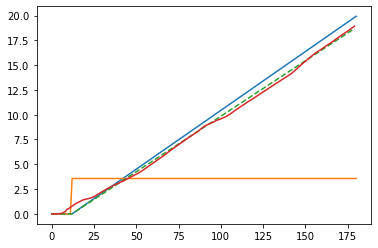

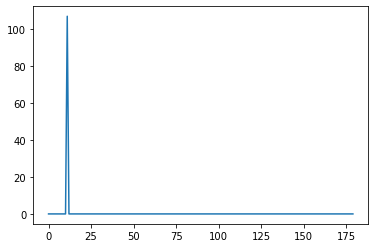

In [155]:
# Trajectory

N = 180
dt = 0.0333
t = np.arange(0,N*dt,dt)

states_ref = [np.zeros(2)]
controls_ref = np.zeros(t.shape[0])
controls_ref[11] = 107

for i in range(t.shape[0]):
    states_ref.append(knife(states_ref[-1],controls_ref[i],dt,d[i],disturb=False))

x_traj = np.vstack((np.array(states_ref)[:,0],np.array(states_ref)[:,1])).T
plt.plot(x_traj)
plt.plot(strain_ref,'--')
plt.plot(strain_actual)
plt.show()

plt.plot(controls_ref)

In [148]:
# Disturbance

d = np.array([ -1.52930865,  -1.52930396,  -1.5292846 ,  -1.52922839,
         2.62729777,  16.93112677,  16.93266055,  16.93268242,
        16.93267911,  16.93264539,  15.76152279,  -2.52193359,
        -6.96797181, -22.41305266, -22.41476882, -22.41478868,
       -22.41478383, -22.41474789, -21.27381373,  -7.86309839,
        -5.62742138,   2.82418524,   4.39765872,   4.39771305,
         4.39773204,   4.39773209,   4.39771388,   4.39766578,
         4.31502514,   2.0750279 ,   0.6155468 ,  -0.37670886,
        -0.40165386,  -0.40171344,  -0.40174204,  -0.40175379,
        -0.40175246,  -0.40173761,  -0.40170373,  -0.40159139,
        -0.31194809,  -0.31172425,  -0.31166057,  -0.31162004,
        -0.31158836,  -0.31155824,  -0.31152333,  -0.31147527,
        -0.31139038,  -0.22483886,   2.19270638,   3.91003304,
         3.9102091 ,   3.91023983,   3.91024944,   3.91024273,
         3.91021639,   3.91015008,   2.89315929,   0.17625073,
         0.12980845,   0.1297426 ,   0.12970278,   0.1296758 ,
         0.12965528,   0.12963692,   0.12961706,   0.1295922 ,
         0.12955826,   0.12950878,   0.12942456,   0.10844884,
        -0.1582517 ,  -0.20548707,  -0.20557218,  -0.20561628,
        -0.205641  ,  -0.20565232,  -0.20565205,  -0.20563932,
        -0.2056088 ,  -0.20553728,   0.03896071,   0.03924784,
         0.03927782,   0.03928733,   0.03928115,   0.03925626,
         0.03919424,  -0.52939449,  -5.20817003,  -5.21576262,
        -5.21579839,  -5.21581093,  -5.21580666,  -5.21578324,
        -5.21572282,  -4.5567325 ,  -1.36846343,  -0.25990023,
         0.72530328,   2.83849457,   4.27378795,   4.27415825,
         4.27419045,   4.27420138,   4.27419623,   4.2741724 ,
         4.27411285,   3.81958266,  -0.11510171,  -0.1644201 ,
        -0.16447107,  -0.16449498,  -0.16450292,  -0.16449781,
        -0.16447863,  -0.16443928,  -0.16432983,  -0.14194236,
        -0.09298393,  -0.09170711,  -0.09161703,  -0.09154777,
        -0.09149114,  -0.09144578,  -0.0914117 ,  -0.0913883 ,
        -0.09137447,  -0.0913692 ,  -0.09137166,  -0.09138066,
        -0.09139345,  -0.09140515,  -0.09141092,  -0.09140761,
        -0.0913922 ,  -0.09135815,  -0.09127637,   0.97367895,
         4.08081443,   4.08202236,   4.08205546,   4.08206703,
         4.08206253,   4.08203975,   4.08198344,   3.8165111 ,
         1.21704858,   0.277997  ,  -0.33336678,  -1.3313093 ,
        -3.1770508 ,  -3.24219609,  -3.2422478 ,  -3.24227015,
        -3.24227535,  -3.24226544,  -3.24223602,  -3.24215962,
        -1.67500898,   0.04238954,   0.04267821,   0.04271443,
         0.04273127,   0.04273508,   0.04272779,   0.04270969,
         0.04268159,   0.04264804,   0.0426165 ,   0.0425911 ,
         0.04257203,   0.0425581 ,   0.04254803,   0.04254071,
         0.04253531,   0.04253129,   0.04252838,   0.04252648,
         0.04252549,   0.04252521])

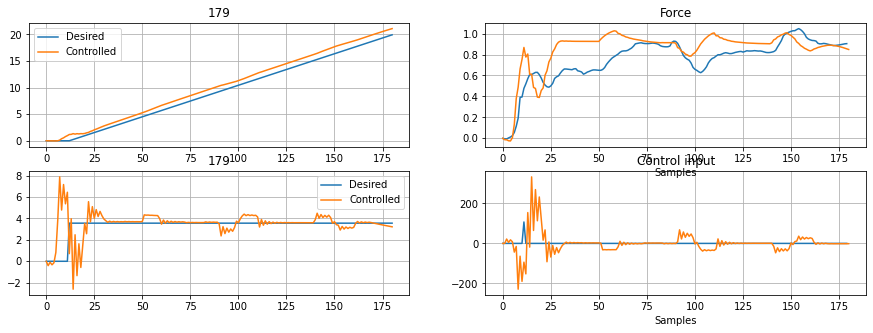

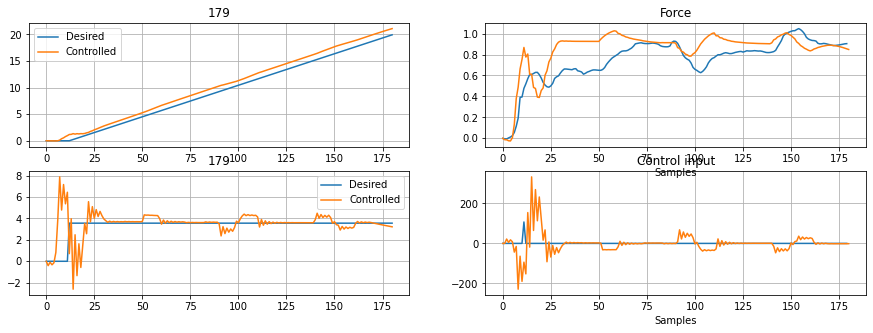

In [177]:
plt.figure(figsize=(15,5))

states = [np.zeros(2)]
controls = [0]
force = [0]

lookahead = 1
dt = 0.0333 / lookahead

Q = np.eye(2); Q[0,0] = 0.1;
R = 0.001

Kfb = 10*np.ones(2)

Nsteps = 180

idx = 0

for j in range(Nsteps):
    # Find closest reference point in front of knife
    idx = min(idx+get_closest_point(x_traj[idx:,0:2],states[-1][0:2])+lookahead,x_traj.shape[0]-1)

    A,B = ref_dynamics(dt=dt)

    # Ricatti 
    P = la.solve_discrete_are(A, B.reshape(2,1), Q, R)
    K = np.matmul((1.0/R)*B.T,P)

    path_err = states[j] - x_traj[idx,:]

    if j>1:
        u = np.matmul(-K,path_err) #- Kfb.dot((np.matmul(A,states[j-1]) + B*u - states[j]))
    else:
        u = np.matmul(-K,path_err)
    
    states.append(knife(states[-1],u,dt,d[j],disturb=True))
    controls.append(u)
    force.append(v2f(force[-1],states[-1][1],dt))

    plt.clf()
    plt.subplot(2,2,1)
    plt.plot(x_traj[:,0],label='Desired')
    plt.plot(np.array(states)[:,0],label='Controlled')
    plt.legend()
    plt.title(j)
    plt.grid()
    
    plt.subplot(2,2,3)
    plt.plot(x_traj[:,1],label='Desired')
    plt.plot(np.array(states)[:,1],label='Controlled')
    plt.legend()
    plt.title(j)
    plt.grid()

    plt.subplot(2,2,4)
    plt.plot(np.array(controls_ref))
    plt.plot(np.array(controls))
    plt.xlabel('Samples')
    plt.title('Control input')
    plt.grid()
    
    plt.subplot(2,2,2)
    plt.plot(np.array(force_actual))
    plt.plot(np.array(force))
    plt.xlabel('Samples')
    plt.title('Force')
    plt.grid()

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [178]:
controls_demo = np.array([-1.88382190e+00, -6.10058213e-01,  1.15160380e+00,  3.61008583e+00,
        6.72257377e+00,  1.01706727e+01,  1.34220809e+01,  1.58588532e+01,
        1.69331940e+01,  1.63069559e+01,  1.39396982e+01,  1.01058847e+01,
        5.33979745e+00,  3.24352223e-01, -4.24628564e+00, -7.79524433e+00,
       -9.95349082e+00, -1.05976802e+01, -9.83709995e+00, -7.96322386e+00,
       -5.37927589e+00, -2.52507143e+00,  1.91534269e-01,  2.44820779e+00,
        4.04060517e+00,  4.89101722e+00,  5.03534295e+00,  4.59512142e+00,
        3.74331611e+00,  2.67118664e+00,  1.56035417e+00,  5.61409695e-01,
       -2.20521659e-01, -7.32561272e-01, -9.72640817e-01, -9.80621353e-01,
       -8.24435020e-01, -5.84503775e-01, -3.39199255e-01, -1.52932289e-01,
       -6.74157842e-02, -9.61853520e-02, -2.22549081e-01, -4.01436508e-01,
       -5.65753754e-01, -6.37533135e-01, -5.43230333e-01, -2.31056833e-01,
        3.13320167e-01,  1.05726503e+00,  1.92178858e+00,  2.79372540e+00,
        3.54719497e+00,  4.06890422e+00,  4.28087080e+00,  4.15548432e+00,
        3.72020480e+00,  3.05138067e+00,  2.25842690e+00,  1.46138383e+00,
        7.66759299e-01,  2.47656291e-01, -6.66991898e-02, -1.89929076e-01,
       -1.67633284e-01, -6.10677544e-02,  6.94452676e-02,  1.77141271e-01,
        2.35188692e-01,  2.36669121e-01,  1.89715462e-01,  1.10289983e-01,
        1.51985816e-02, -8.26122901e-02, -1.75424945e-01, -2.58947495e-01,
       -3.28652628e-01, -3.76321176e-01, -3.88901896e-01, -3.51056878e-01,
       -2.51411503e-01, -9.09695255e-02,  1.09103772e-01,  3.03614557e-01,
        4.26117965e-01,  3.99488012e-01,  1.53118547e-01, -3.56902708e-01,
       -1.13019957e+00, -2.11298388e+00, -3.20134787e+00, -4.25693242e+00,
       -5.13065947e+00, -5.68804303e+00, -5.83047946e+00, -5.50950983e+00,
       -4.73321517e+00, -3.56478312e+00, -2.11357733e+00, -5.19791089e-01,
        1.06489287e+00,  2.49713680e+00,  3.65875832e+00,  4.46804417e+00,
        4.88473942e+00,  4.90958811e+00,  4.58036056e+00,  3.96607839e+00,
        3.15978601e+00,  2.26885444e+00,  1.40183868e+00,  6.52815533e-01,
        8.67078845e-02, -2.69799043e-01, -4.28667094e-01, -4.32336780e-01,
       -3.39932181e-01, -2.12060173e-01, -9.80609551e-02, -2.81829321e-02,
       -1.14687567e-02, -3.86993526e-02, -8.88295263e-02, -1.36990838e-01,
       -1.62210363e-01, -1.53330316e-01, -1.12074616e-01, -5.27150218e-02,
        1.67670133e-03,  2.58295486e-02,  5.54872427e-04, -7.90395937e-02,
       -1.97537919e-01, -3.17526912e-01, -3.83747216e-01, -3.33346625e-01,
       -1.10749574e-01,  3.16154048e-01,  9.43007881e-01,  1.72355495e+00,
        2.57423086e+00,  3.38793941e+00,  4.05299977e+00,  4.47201896e+00,
        4.57662047e+00,  4.33626591e+00,  3.76114491e+00,  2.89967690e+00,
        1.83119176e+00,  6.54716678e-01, -5.24361940e-01, -1.60735091e+00,
       -2.51278538e+00, -3.18308707e+00, -3.58707104e+00, -3.71905667e+00,
       -3.59607307e+00, -3.25464026e+00, -2.74766215e+00, -2.14063512e+00,
       -1.50570278e+00, -9.12842612e-01, -4.19402470e-01, -6.09871252e-02,
        1.53097754e-01,  2.38243609e-01,  2.27518790e-01,  1.61714565e-01,
        7.94667316e-02,  9.90043048e-03, -3.09207794e-02, -3.97233967e-02,
       -2.28890927e-02,  8.08892513e-03,  4.11028755e-02,  6.67968520e-02,
        8.02741134e-02,  8.11669825e-02,  7.24974891e-02,  5.89520659e-02,
        4.51810922e-02,  3.45689067e-02])

In [179]:
def generative_controller_model(x_traj,sigQ1=1,sigQ2=1,sigR=0.05,lookahead=1,Nsteps=200, dt=0.0333):

    controls = [0]
    idx = 0
    
    Q = np.eye(2); Q[0,0] = sigQ1**2; Q[1,1] = sigQ2**2
    R = sigR**2

    for j in range(Nsteps):
        
        # Find closest reference point in front of knife
        idx = min(idx+get_closest_point(x_traj[idx:,0:2],states_demo[-1][0:2])+lookahead,x_traj.shape[0]-1)

        A,B = ref_dynamics(dt=dt)

        # Ricatti 
        P = la.solve_discrete_are(A, B.reshape(2,1), Q, R)
        K = np.matmul((1.0/R)*B.T,P)

        path_err = states_demo[j] - x_traj[idx,:]
                            
        u = np.matmul(-K,path_err) - d[j]

        controls.append(u)
        
    return controls

In [180]:
def cost(X):
    X = np.abs(X)
    controls_gen = generative_controller_model(x_traj,sigQ1=X[0],sigQ2=X[1],sigR=X[2],lookahead=1, Nsteps=180, dt=0.0333)
    c = np.sum((controls_demo[:-1]-np.array(controls_gen))**2) #+ np.sum(np.array(states_gt)-np.array(states_gen))**2
    return c

In [181]:
c_weights = np.abs(fmin(cost,np.array([1,1,0.005]),xtol=1e-12,maxiter=500,ftol=1e-12))
print(c_weights)

KeyboardInterrupt: 

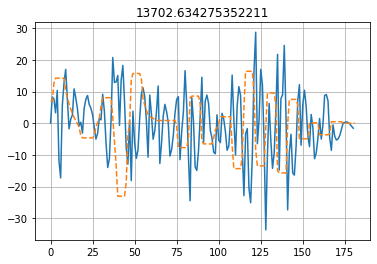

In [343]:
#Sanity check on controls

controls_gen = generative_controller_model(x_traj,sigQ1=c_weights[0],sigQ2=c_weights[1],sigR=c_weights[2],lookahead=1, Nsteps=180, dt=0.0333)
plt.plot(controls_gen)
plt.plot(controls_demo,'--')
plt.title(cost(c_weights))
plt.grid()
plt.show()

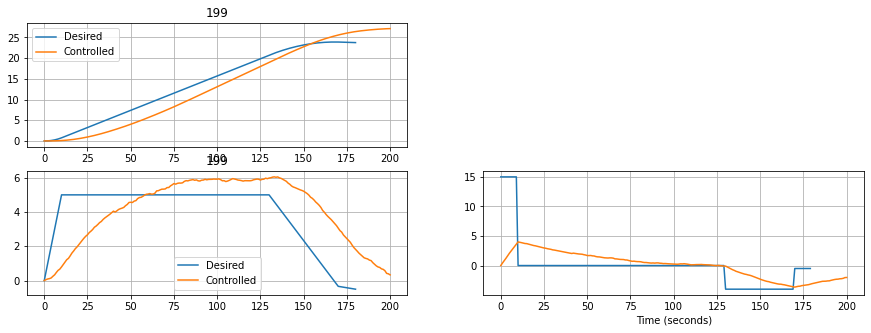

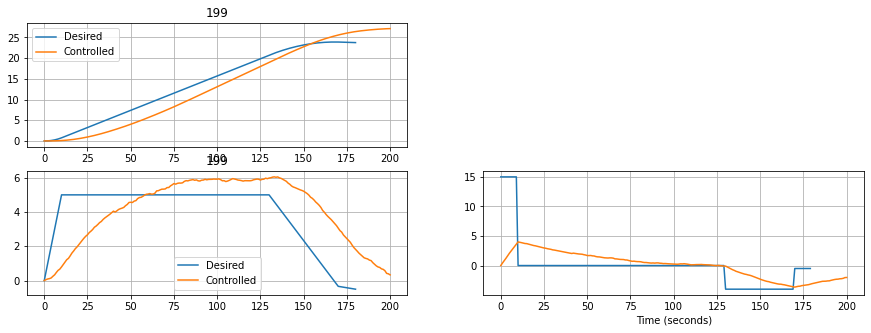

In [344]:
plt.figure(figsize=(15,5))

states = [np.zeros(2)]
controls = [0]

lookahead = 1

Q = np.eye(2); Q[0,0] = c_weights[0]**2; Q[1,1] = c_weights[1]**2
R = c_weights[2]**2
Kfb = np.array([c_weights[3]**2,c_weights[4]**2])

Nsteps = 200

idx = 0

for j in range(Nsteps):
    # Find closest reference point in front of knife
    idx = min(idx+get_closest_point(x_traj[idx:,0:2],states[-1][0:2])+lookahead,x_traj.shape[0]-1)

    A,B = ref_dynamics(dt=dt)

    # Ricatti 
    P = la.solve_discrete_are(A, B.reshape(2,1), Q, R)
    K = np.matmul((1.0/R)*B.T,P)

    path_err = states[j] - x_traj[idx,:]

    if j>1:
        u = np.matmul(-K,path_err) + Kfb.dot((np.matmul(A,states[j-1]) + B*u - states[j]))
    else:
        u = np.matmul(-K,path_err)
    
    states.append(knife(states[-1],u,dt,noisy=True))
    controls.append(u)

    plt.clf()
    plt.subplot(2,2,1)
    plt.plot(x_traj[:,0],label='Desired')
    plt.plot(np.array(states)[:,0],label='Controlled')
    plt.legend()
    plt.title(j)
    plt.grid()
    
    plt.subplot(2,2,3)
    plt.plot(x_traj[:,1],label='Desired')
    plt.plot(np.array(states)[:,1],label='Controlled')
    plt.legend()
    plt.title(j)
    plt.grid()

    plt.subplot(2,2,4)
    plt.plot(np.array(controls_ref))
    plt.plot(np.array(controls))
    plt.xlabel('Time (seconds)')
    plt.grid()

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [325]:
np.matmul(-K,path_err) - Kfb.dot((np.matmul(A,states[j-1]) + B*u - states[j]))

array([1.23449769, 0.66224817])